In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

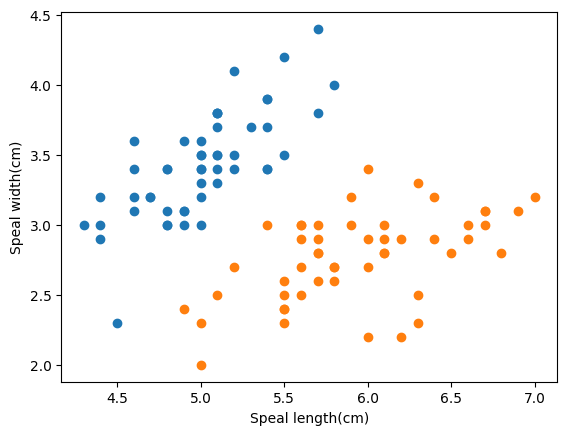

In [2]:
#Irisデータを読み込み
iris = datasets.load_iris()

iris_data = iris.data

#散布図
st_data = iris_data[:50]
vc_data = iris_data[50:100]
plt.scatter(st_data[:,0],st_data[:,1],label="Setosa")
plt.scatter(vc_data[:,0],vc_data[:,1],label="Versicolor")

plt.xlabel("Speal length(cm)")
plt.ylabel("Speal width(cm)")
plt.show()

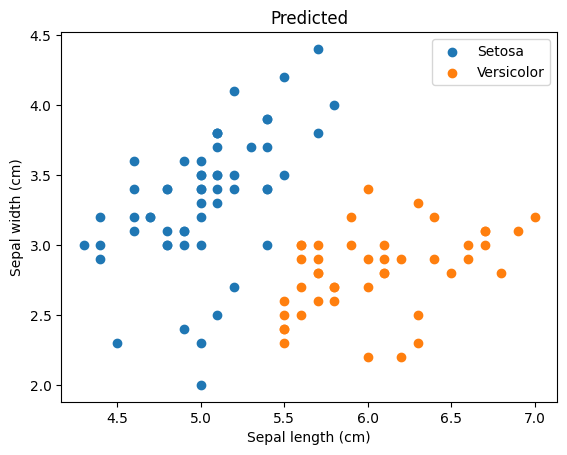

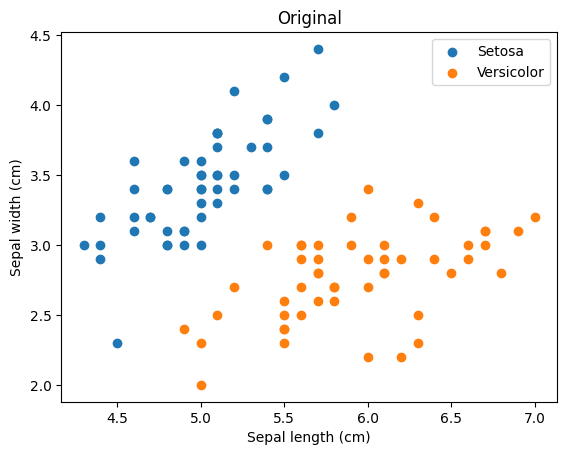

In [3]:
#単一ニューロンによる分類

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() # SetosaとVersicolor、Sepal length: copy()で元データが変更されない
sw_data = iris_data[:100, 1].copy() # SetosaとVersicolor、Sepal width

#平均値を0にする
#ニューラルネットワークの入力に偏りが無いようにするたｍ
sl_ave = np.average(sl_data)
sl_data -= sl_ave
sw_ave = np.average(sw_data)
sw_data -= sw_ave

input_data = []
for i in range(100):
  input_data.append([sl_data[i],sw_data[i]])

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):  # 初期設定
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):  # 初期設定
        self.neuron = Neuron()  #ニューロンのインスタンス
        self.w = [0.5, -0.2]
        self.bias = 0.0

    def commit(self, input_data):  # 実行
        self.neuron.reset()

        self.neuron.set_input(input_data[0] * self.w[0])
        self.neuron.set_input(input_data[1] * self.w[1])
        self.neuron.set_input(self.bias)
        return self.neuron.get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

st_predicted = [[],[]]
vc_predicted = [[],[]]
for data in input_data:
  if neural_network.commit(data) < 0.5:
    st_predicted[0].append(data[0]+sl_ave)
    st_predicted[1].append(data[1]+sw_ave)
  else:
    vc_predicted[0].append(data[0]+sl_ave)
    vc_predicted[1].append(data[1]+sw_ave)

# 分類結果を散布図で表示
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

# 比較用に元の分類を散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()